In [7]:
import uproot
import awkward as ak
import numpy as np
import math
import hist
import matplotlib.pyplot as plt
import os
import subprocess
import vector

In [8]:
vector.register_awkward() 

In [9]:
DATATYPE="data"
assert((DATATYPE=="mc") or (DATATYPE=="data"))
BASEDIR="." # basedir where to look for runXXX.DATATYPE.root files
IS_MC=True if DATATYPE=="mc" else False

In [10]:
!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/JIjQaAYEQnmRDkX/291694/AnalysisResults.root' > run291694.data.root

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0   132k      0  0:12:53  0:12:53 --:--:-- 1450k  0  0:21:06  0:00:18  0:20:48  104k 108k      0  0:15:50  0:00:59  0:14:51  110k3k      0  0:15:05  0:01:28  0:13:37  127k0   120k      0  0:14:12  0:06:42  0:07:30 92578   120k      0  0:14:15  0:07:02  0:07:13  114k  0     0   116k      0  0:14:44  0:09:21  0:05:23  112k   116k      0  0:14:44  0:09:22  0:05:22  111k     0   116k      0  0:14:44  0:09:33  0:05:11  103k    0  0:15:02  0:10:53  0:04:09 56166


In [1]:
!file *.root
file = uproot.open("run291694.data.root")
file.keys()
events = file["eventsTree"]
events.show()

run290223.data.root: ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


NameError: name 'uproot' is not defined

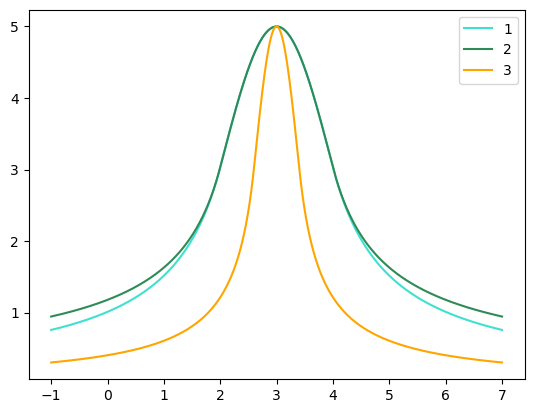

In [4]:
import uproot
import awkward as ak
import numpy as np
import math
import hist
import matplotlib.pyplot as plt
import os
import subprocess
import vector

vector.register_awkward() 

DATATYPE="mc"
assert((DATATYPE=="mc") or (DATATYPE=="data"))
BASEDIR="." # basedir where to look for runXXX.DATATYPE.root files
IS_MC=True if DATATYPE=="mc" else False

def CrystalBall(x, mu, sigma, alpha, alphabis, N, n, nbis):
    A = ((n/np.abs(alpha))**n)*np.exp(-(np.abs(alpha)**2)/2.)
    B = (n/np.abs(alpha))-np.abs(alpha)
    C = ((nbis/np.abs(alphabis))**nbis)*np.exp(-(np.abs(alphabis)**2)/2.)
    D = (nbis/np.abs(alphabis))-np.abs(alphabis)
    y = np.array([], dtype=float)
    for i in x:
        if((((i-mu)/sigma) >= alpha) and (((i-mu)/sigma) <= alphabis)):
            y = np.append(y, N*np.exp(-((i-mu)**2)/(2*sigma**2)))
        elif (((i-mu)/sigma) < alpha):
            y = np.append(y, N*A*((B- (i -mu)/(sigma))**(-n)))
        elif(((i-mu)/sigma) > alphabis):
            y = np.append(y, N*C*((D+ (i -mu)/(sigma))**(-nbis)))
        else:
            y = np.append(y, 0.)
    return y
        
xarray = np.linspace(-1., 7., 10000)
yarray = np.array([], dtype=float)

yarray = CrystalBall(xarray, mu=3., sigma=1.,alpha=-1., alphabis=1. , N=5., n=1., nbis=1.)
yarray2 = CrystalBall(xarray, mu=3., sigma=1.,alpha=-1., alphabis=1. , N=5., n=0.7, nbis=0.7)
yarray3 = CrystalBall(xarray, mu=3., sigma=0.4,alpha=-1., alphabis=1. , N=5., n=1., nbis=1.)

plt.plot(xarray, yarray, color="turquoise", label="1")
plt.plot(xarray, yarray2, color="seagreen", label="2")
plt.plot(xarray, yarray3, color="orange", label="3")
plt.legend()
plt.show()